In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('./data/train.csv')
df_train

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51


In [3]:
df_test = pd.read_csv('./data/test.csv')
df_test

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15
...,...,...,...,...,...,...,...,...,...
478,TEST_478,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,4.207,306.443,2,1,7,4.207,55.13
479,TEST_479,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,-0.608,335.398,5,0,1,-1.736,70.16
480,TEST_480,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,1.792,349.383,3,1,3,1.792,69.72
481,TEST_481,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,0.790,341.132,3,2,2,0.423,69.64


In [4]:
df_sample = pd.read_csv('./data/sample_submission.csv')
df_sample

,id,MLM,HLM
0,TEST_000,0,0
1,TEST_001,0,0
2,TEST_002,0,0
3,TEST_003,0,0
4,TEST_004,0,0
...,...,...,...
478,TEST_478,0,0
479,TEST_479,0,0
480,TEST_480,0,0
481,TEST_481,0,0


In [5]:
# column 순서 조절 및 'id' drop
new_column_order = ['id', 'MLM', 'HLM', 'SMILES', 'AlogP', 'Molecular_Weight',
                    'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD',
                    'Molecular_PolarSurfaceArea']

df_train = df_train[new_column_order]
df_train = df_train.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)
df_train.head()

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5,2,8,3.259,117.37
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2,1,2,2.172,73.47
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5,0,3,1.585,62.45
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6,0,5,3.475,92.60
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3,0,1,2.337,42.43


In [6]:
df_test.head()

,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76
1,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31
2,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86
3,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21
4,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15


In [7]:
# ! pip install sweetviz

In [8]:
# import sweetviz as sw

# analyze_report = sw.analyze(df_train)
# analyze_report.show_html('train_output.html', open_browser= True)

In [9]:
# comparison_report = sw.compare(df_train, df_test)
# comparison_report.show_html('train_test_compare_output.html', open_browser= True)

In [10]:
# ! pip install rdkit

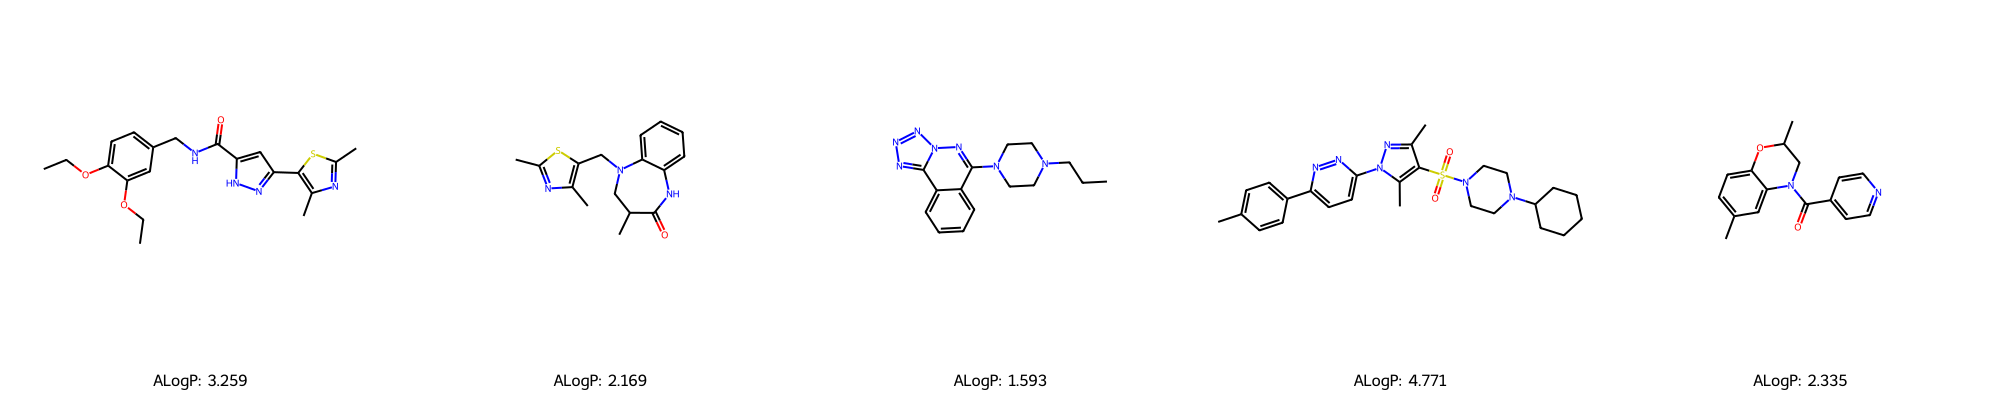

In [11]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole

def show_smiles(smiles):
  data_smiles = smiles['SMILES']
  # Convert the SMILES strings to RDKit molecules
  molecules = [Chem.MolFromSmiles(smile) for smile in data_smiles]

  # Draw the first molecules
  img = Draw.MolsToGridImage(molecules[:5], molsPerRow=5, subImgSize=(400,400),
                             legends=[f'ALogP: {round(x, 3)}' for x in smiles['AlogP']], 
                             returnPNG=False)
                             
  from IPython.display import display, Image
  display(img)

show_smiles(df_train)

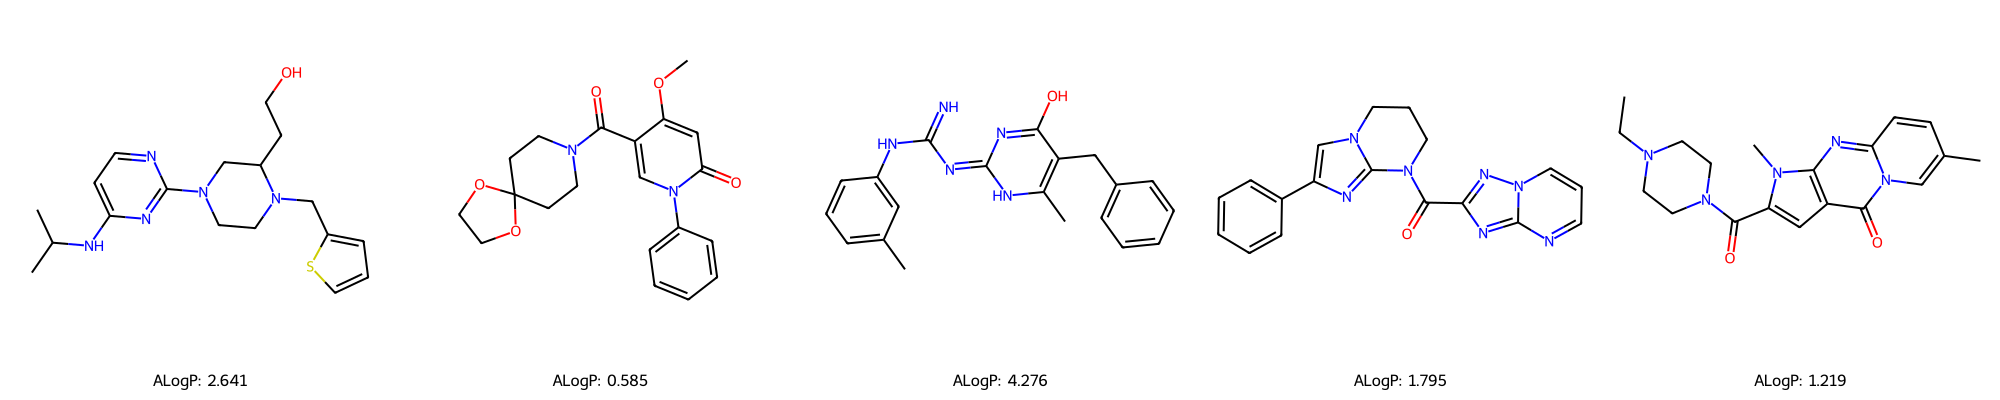

In [12]:
show_smiles(df_test)

In [13]:
def resumetable(df):
    print(f'dataset size: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['data type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'feature'})
    summary['num of missing value'] = df.isnull().sum().values
    summary['num of unique value'] = df.nunique().values
    summary['First value'] = df.loc[0].values
    summary['Second value'] = df.loc[1].values
    summary['Third value'] = df.loc[2].values
    
    return summary

resumetable(df_train)

dataset size: (3498, 10)


,feature,data type,num of missing value,num of unique value,First value,Second value,Third value
0,MLM,float64,0,2735,26.01,29.27,5.586
1,HLM,float64,0,2781,50.68,50.59,80.892
2,SMILES,object,0,3471,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1
3,AlogP,float64,2,2561,3.259,2.169,1.593
4,Molecular_Weight,float64,0,3052,400.495,301.407,297.358
5,Num_H_Acceptors,int64,0,15,5,2,5
6,Num_H_Donors,int64,0,10,2,1,0
7,Num_RotatableBonds,int64,0,20,8,2,3
8,LogD,float64,0,2635,3.259,2.172,1.585
9,Molecular_PolarSurfaceArea,float64,0,2164,117.37,73.47,62.45


In [14]:
resumetable(df_test)

dataset size: (483, 8)


,feature,data type,num of missing value,num of unique value,First value,Second value,Third value
0,SMILES,object,0,483,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1
1,AlogP,float64,1,465,2.641,0.585,4.276
2,Molecular_Weight,float64,0,469,361.505,370.399,347.414
3,Num_H_Acceptors,int64,0,12,4,5,4
4,Num_H_Donors,int64,0,6,2,0,4
5,Num_RotatableBonds,int64,0,14,7,3,5
6,LogD,float64,0,466,2.635,0.585,4.29
7,Molecular_PolarSurfaceArea,float64,0,430,92.76,68.31,92.86


In [15]:
# SMILES (Simplified Molecular Input Line Entry System): 분자의 화학 구조를 문자열로 표현하는 방법입니다. SMILES 표기법은 분자 구조를 간단하게 표현하고 공유기와 원자들의 연결을 나타냅니다.
# MLM (Mouse Liver Microsome): 쥐의 간을 이용하여 약물의 대사 반응을 조사하는 실험에서 얻어진 데이터입니다. 이 데이터는 약물의 간 대사 반응과 관련된 정보를 제공합니다.
# HLM (Human Liver Microsome): 사람의 간을 이용하여 약물의 대사 반응을 조사하는 실험에서 얻어진 데이터입니다. 이 데이터는 인간 간에서의 약물 대사 반응과 관련된 정보를 제공합니다.
# AlogP (Partition Coefficient): 유기 화합물의 수분해성을 나타내는 지표로, 낮을수록 물에 녹기 쉽고 수분해성이 높음을 나타냅니다. AlogP 값이 낮을수록 화학물질이 지방성을 가지며, 높을수록 극성을 가집니다.
# LogD: LogD는 pH에 따라 분배 계수가 변하는 경우를 고려하여 약물의 수분해성과 지방용해성을 동시에 고려하는 지표입니다. pH에 따라 약물의 화학적 특성이 변화할 때 유용하게 사용됩니다.
# Molecular Weight (분자량): 화학 물질의 분자 내에 포함된 모든 원자의 원자량을 합산한 값으로, 화학 물질의 질량을 나타냅니다.
# Num_H_Acceptors (수소 수용체 개수): 화학 물질의 분자 내에 수소 원자가 수용체로 작용하는 원자나 결합의 개수를 나타냅니다. 이 값은 화학적 상호작용에 영향을 미칠 수 있습니다.
# Num_H_Donors (수소 기부체 개수): 화학 물질의 분자 내에서 수소 원자가 다른 원자나 결합에 수소 원자를 기부하는 경우의 개수를 나타냅니다. 이 값은 화학 반응과 상호작용을 나타내는 중요한 지표입니다.
# Num_RotatableBonds (회전 결합 수): 화학 물질의 분자 내에서 회전이 가능한 결합의 수를 나타냅니다. 이 값은 분자의 유연성을 나타내며, 약물의 바인딩 및 대사 반응에 영향을 미칠 수 있습니다.
# Molecular Polar Surface Area (분자 극성 표면 면적): 분자의 극성을 나타내는 지표로, 분자 표면에서 극성 원자 또는 결합의 면적을 나타냅니다. 극성 표면 면적은 약물의 특성과 상호작용을 예측하는 데 사용됩니다.

## AlogP는 MCAR, MAR, NMAR 어떤 종류의 결측값인가?
MCAR: If the missing values do not have any relation to the column it belongs to and with the rest of the columns in the dataset then it is called Missing Completely at Random.   
MAR: If the missing values do not have any relation to the column it belongs to but have a relation with any other columns in the dataset it is called Missing At Random   
MNAR: If the missing values do have a relation to the column it belongs to but do not have a relation with any other columns in the dataset it is called Missing Not at Random.

In [16]:
# AlogP는 MAR에 가깝다고 추정 / Molecular_Weight, Num_H_Acceptors 등 다른 열 정보로 추정이 가능하지 않을까.
# LogD와 상관관계가 상당히 높음

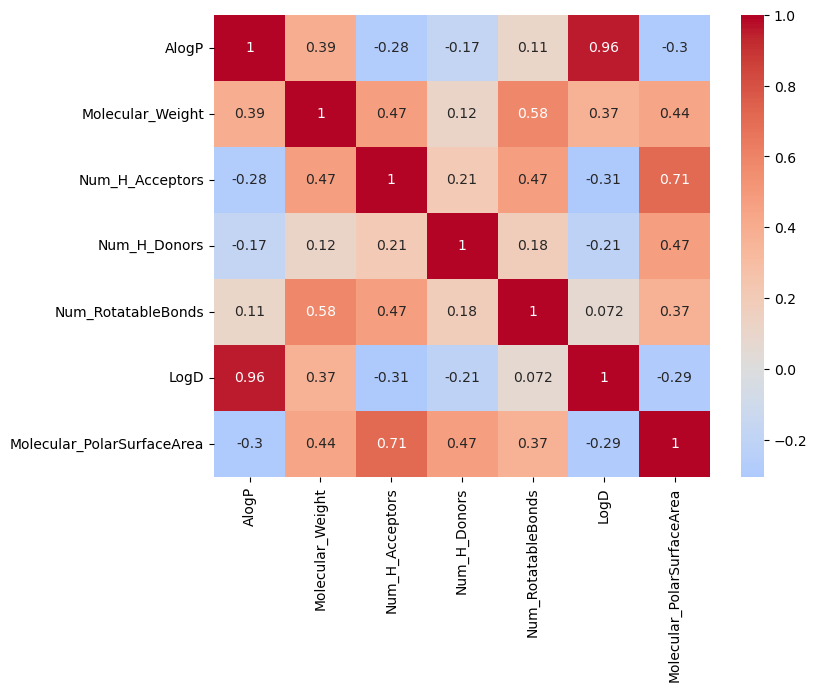

In [17]:
df_corr = df_train.iloc[:, 3:]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0);

In [18]:
df_train[df_train.AlogP.isna()]

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
2796,0.549,0.2,[H][C@]1(CC[C@@]2([H])[C@@H](C)C=CC3=C[C@H](C)...,NaN,418.566,5,1,7,4.634,72.83
3387,0.240,3.2,COc1cc2c(cc1OC)/C(=N\c1ccccc1)N(Cc1ccccc1F)CC2,NaN,390.450,3,0,5,4.911,34.06


train 데이터 27 쌍이 같은 인풋값을 가지나 MLM, HLM이 불일치

In [19]:
duplicated_rows = df_train[df_train.iloc[:, 2:].duplicated(keep=False)]
sorted_duplicates = duplicated_rows.sort_values(by='SMILES', ascending=False)

sorted_duplicates

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
2134,1.416,1.404,O=S(=O)(c1ccccc1)n1ccc(C/C=C/Cc2ccn(S(=O)(=O)c...,5.630,466.572,4,0,8,5.630,94.90
3265,10.930,20.330,O=S(=O)(c1ccccc1)n1ccc(C/C=C/Cc2ccn(S(=O)(=O)c...,5.630,466.572,4,0,8,5.630,94.90
2332,0.007,0.038,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6,1,2,-0.533,111.44
2159,113.210,99.000,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6,1,2,-0.533,111.44
216,40.530,87.780,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7,0,4,-1.133,108.65
2850,99.900,99.900,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7,0,4,-1.133,108.65
3346,80.700,90.890,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6,1,4,4.304,113.53
2575,31.926,36.574,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6,1,4,4.304,113.53
898,53.850,71.640,Cc1ccc(-c2ccc(C(CN3CCCC3)N(C)C(=O)CN3C(=O)COc4...,4.282,553.480,5,0,7,4.009,65.98
1315,58.237,60.612,Cc1ccc(-c2ccc(C(CN3CCCC3)N(C)C(=O)CN3C(=O)COc4...,4.282,553.480,5,0,7,4.009,65.98


In [20]:
average_df = sorted_duplicates.groupby('SMILES').mean().reset_index()

# column 순서 조절
new_column_order = ['MLM', 'HLM', 'SMILES', 'AlogP', 'Molecular_Weight',
                    'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD',
                    'Molecular_PolarSurfaceArea']

average_df = average_df[new_column_order]
average_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,0.9225,28.0615,C(=C/c1nnn(Cc2ccccc2)n1)\c1ccccc1,3.556,262.309,3.0,0.0,4.0,3.556,43.60
1,62.2175,77.9110,CC(=O)Nc1ccc(N2N=C(c3ccc(O)cc3)C(C)CC2=O)cc1,2.172,337.372,4.0,2.0,3.0,2.169,82.00
2,68.6310,64.6690,CC(=O)Nc1nc2ccc(-c3nn(C(C)C)c4nc(N)ncc34)cc2s1,2.293,367.428,5.0,2.0,3.0,2.307,139.85
3,32.1435,85.6850,CC(C)(C)OC(=O)N1CCC(c2n[nH]c3nc(S(C)(=O)=O)ncc...,1.684,381.450,7.0,1.0,4.0,1.684,126.52
4,3.6870,43.3385,CC(C)COc1cc(=O)n2c(c1C(=O)N1CCC(C)CC1)CCCCC2,2.843,360.490,3.0,0.0,4.0,2.843,49.85
5,62.1085,68.1015,CC(C)NC(=O)c1c(Cl)nn(C)c1NC(=O)c1cc(Br)nn1-c1n...,3.750,501.165,5.0,2.0,5.0,3.750,106.72
6,43.1700,31.1300,CC1CC(=O)N(c2ccc(-c3cccc(C#N)c3)cc2)N=C1c1ccc(...,4.449,381.427,4.0,1.0,3.0,4.446,76.69
7,2.3395,36.8145,CCCCC/N=c1\n(C)c(=O)nc2sccn12,2.484,252.336,4.0,0.0,4.0,2.474,73.56
8,3.4420,3.6015,CCOC(=O)CC1(NC(=O)N2Cc3c(sc4c3CCCC4)-n3cccc3C2...,6.727,537.736,3.0,1.0,6.0,6.727,120.05
9,73.5450,1.1345,CCc1nc2cc(Br)c(C(=O)OC)nc2n1CC(=O)c1ccccc1,3.815,402.242,5.0,0.0,6.0,3.819,74.08


In [21]:
# 테스트 데이터는 문제 없음
duplicated_rows_test = df_test[df_test.duplicated(keep=False)]
sorted_duplicates_test = duplicated_rows_test.sort_values(by='SMILES', ascending=False)

sorted_duplicates_test

,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea


In [22]:
# 중복값 제거
unique_df = df_train[~df_train.iloc[:, 2:].duplicated(keep=False)]
unique_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5,2,8,3.259,117.37
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2,1,2,2.172,73.47
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5,0,3,1.585,62.45
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6,0,5,3.475,92.60
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...
3493,1.556,3.079,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,3.409,396.195,3,1,5,3.409,64.74
3494,35.560,47.630,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,1.912,359.381,4,1,3,1.844,77.37
3495,56.150,1.790,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,1.941,261.320,3,1,6,2.124,70.14
3496,0.030,2.770,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.989,284.696,5,1,5,0.989,91.51


In [23]:
merged_df = pd.concat([unique_df, average_df])
merged_df.reset_index(drop = True, inplace = True)
merged_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,26.0100,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37
1,29.2700,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47
2,5.5860,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45
3,5.7100,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60
4,93.2700,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...
3466,56.0435,66.126,Cc1ccc(-c2ccc(C(CN3CCCC3)N(C)C(=O)CN3C(=O)COc4...,4.282,553.480,5.0,0.0,7.0,4.009,65.98
3467,56.3130,63.732,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6.0,1.0,4.0,4.304,113.53
3468,70.2150,93.840,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7.0,0.0,4.0,-1.133,108.65
3469,56.6085,49.519,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6.0,1.0,2.0,-0.533,111.44


In [24]:
merged_df[merged_df.AlogP.isna()]

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
2752,0.549,0.2,[H][C@]1(CC[C@@]2([H])[C@@H](C)C=CC3=C[C@H](C)...,NaN,418.566,5.0,1.0,7.0,4.634,72.83
3334,0.240,3.2,COc1cc2c(cc1OC)/C(=N\c1ccccc1)N(Cc1ccccc1F)CC2,NaN,390.450,3.0,0.0,5.0,4.911,34.06


In [25]:
# 결측치 대체
merged_df['AlogP'].fillna(merged_df['LogD'], inplace=True)
row_2752 = merged_df.loc[[2752]]
row_3334 = merged_df.loc[[3334]]

missing_df = pd.concat([row_2752, row_3334])
missing_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
2752,0.549,0.2,[H][C@]1(CC[C@@]2([H])[C@@H](C)C=CC3=C[C@H](C)...,4.634,418.566,5.0,1.0,7.0,4.634,72.83
3334,0.240,3.2,COc1cc2c(cc1OC)/C(=N\c1ccccc1)N(Cc1ccccc1F)CC2,4.911,390.450,3.0,0.0,5.0,4.911,34.06


train 같은 인풋값 대비 여러 아웃풋 MLM, HLM average로 변환, 결측치 AlogP LogD로 채움.

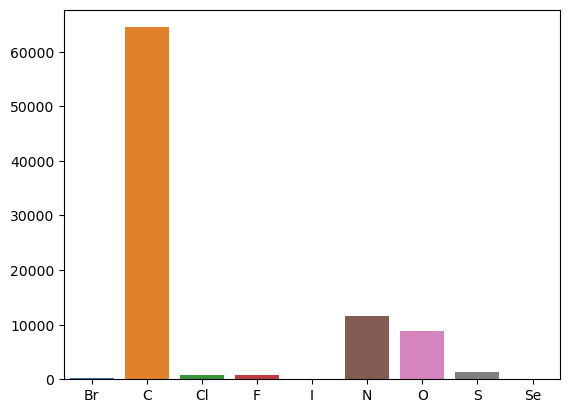

In [26]:
# 원자 빈도수 특성 추가 고려
def atom_frequency(smiles_list):
    atom_counts = []
    for smiles in smiles_list:
        # Convert the SMILES string to an RDKit molecule object
        mol = Chem.MolFromSmiles(smiles)
        # Get the atoms in the molecule
        atoms = mol.GetAtoms()
        # Add the symbol for each atom to the atom_counts list
        atom_counts.extend([atom.GetSymbol() for atom in atoms])

    # Create a pandas series with the counts of each atom type
    plot_data = pd.Series(atom_counts).value_counts().sort_index()
    sns.barplot(x=plot_data.index, y=plot_data.values)

atom_frequency(merged_df['SMILES'])

In [27]:
from collections import Counter

def count_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        atom_symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
        atom_counts = dict(Counter(atom_symbols))
        return atom_counts
    else:
        return {}

merged_df['Atom_Counts'] = merged_df['SMILES'].apply(count_atoms)
merged_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,Atom_Counts
0,26.0100,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37,"{'C': 20, 'O': 3, 'N': 4, 'S': 1}"
1,29.2700,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47,"{'C': 16, 'N': 3, 'O': 1, 'S': 1}"
2,5.5860,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45,"{'C': 15, 'N': 7}"
3,5.7100,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60,"{'C': 26, 'N': 6, 'S': 1, 'O': 2}"
4,93.2700,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43,"{'C': 16, 'N': 2, 'O': 2}"
...,...,...,...,...,...,...,...,...,...,...,...
3466,56.0435,66.126,Cc1ccc(-c2ccc(C(CN3CCCC3)N(C)C(=O)CN3C(=O)COc4...,4.282,553.480,5.0,0.0,7.0,4.009,65.98,"{'C': 29, 'N': 4, 'O': 3, 'Cl': 2}"
3467,56.3130,63.732,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6.0,1.0,4.0,4.304,113.53,"{'C': 24, 'N': 5, 'O': 3, 'S': 1}"
3468,70.2150,93.840,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7.0,0.0,4.0,-1.133,108.65,"{'N': 5, 'C': 19, 'O': 4}"
3469,56.6085,49.519,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6.0,1.0,2.0,-0.533,111.44,"{'N': 6, 'C': 13, 'O': 3}"


In [28]:
atom_counts_df = pd.DataFrame(merged_df['Atom_Counts'].tolist()).fillna(0).astype(int)
merged_df = pd.concat([merged_df, atom_counts_df], axis=1)
merged_df = merged_df.drop(columns=['Atom_Counts'])

merged_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,C,O,N,S,F,Cl,Br,Se,I
0,26.0100,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37,20,3,4,1,0,0,0,0,0
1,29.2700,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47,16,1,3,1,0,0,0,0,0
2,5.5860,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45,15,0,7,0,0,0,0,0,0
3,5.7100,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60,26,2,6,1,0,0,0,0,0
4,93.2700,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43,16,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,56.0435,66.126,Cc1ccc(-c2ccc(C(CN3CCCC3)N(C)C(=O)CN3C(=O)COc4...,4.282,553.480,5.0,0.0,7.0,4.009,65.98,29,3,4,0,0,2,0,0,0
3467,56.3130,63.732,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6.0,1.0,4.0,4.304,113.53,24,3,5,1,0,0,0,0,0
3468,70.2150,93.840,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7.0,0.0,4.0,-1.133,108.65,19,4,5,0,0,0,0,0,0
3469,56.6085,49.519,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6.0,1.0,2.0,-0.533,111.44,13,3,6,0,0,0,0,0,0


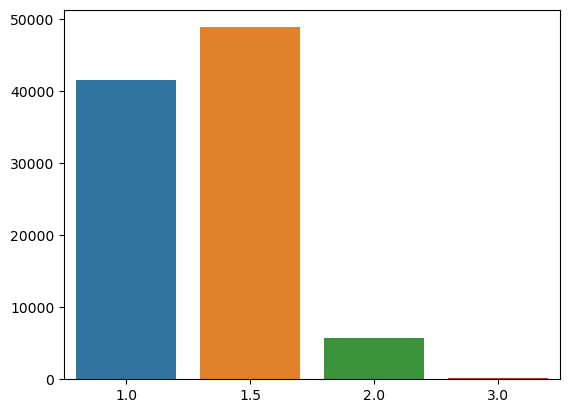

In [29]:
# 결합 빈도수 특성 추가 고려
def bond_frequency_plot(smiles_list):
    bond_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        bonds = mol.GetBonds()
        bond_counts.extend([bond.GetBondTypeAsDouble() for bond in bonds])
    plot_data = pd.Series(bond_counts).value_counts().sort_index()
    sns.barplot(x=plot_data.index, y=plot_data.values)

bond_frequency_plot(merged_df['SMILES'])

In [30]:
def bond_frequency(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        bonds = mol.GetBonds()
        bond_counts = [bond.GetBondTypeAsDouble() for bond in bonds]
        bond_freq = dict(Counter(bond_counts))
        return bond_freq
    else:
        return {}

# dictionary 형태로 저장 및 pandas column 변환
merged_df['Bond_Frequencies'] = merged_df['SMILES'].apply(bond_frequency)
bond_freq_df = pd.DataFrame(merged_df['Bond_Frequencies'].tolist()).fillna(0).astype(int)
merged_df = pd.concat([merged_df, bond_freq_df], axis=1)

# 추출한 특성 drop
merged_df = merged_df.drop(columns=['Bond_Frequencies'])

# 결합 column name 변경
new_column_names = {
    1.0: 'Bond10',
    1.5: 'Bond15',
    2.0: 'Bond20',
    3.0: 'Bond30'
}
merged_df = merged_df.rename(columns=new_column_names)

merged_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,...,S,F,Cl,Br,Se,I,Bond10,Bond15,Bond20,Bond30
0,26.0100,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37,...,1,0,0,0,0,0,13,16,1,0
1,29.2700,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47,...,1,0,0,0,0,0,11,11,1,0
2,5.5860,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45,...,0,0,0,0,0,0,10,15,0,0
3,5.7100,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60,...,1,0,0,0,0,0,20,17,2,0
4,93.2700,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43,...,0,0,0,0,0,0,9,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,56.0435,66.126,Cc1ccc(-c2ccc(C(CN3CCCC3)N(C)C(=O)CN3C(=O)COc4...,4.282,553.480,5.0,0.0,7.0,4.009,65.98,...,0,0,2,0,0,0,22,18,2,0
3467,56.3130,63.732,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6.0,1.0,4.0,4.304,113.53,...,1,0,0,0,0,0,7,27,3,0
3468,70.2150,93.840,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7.0,0.0,4.0,-1.133,108.65,...,0,0,0,0,0,0,22,6,2,1
3469,56.6085,49.519,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6.0,1.0,2.0,-0.533,111.44,...,0,0,0,0,0,0,15,6,2,1


# 전체 letter의 개수를 세는게 의미가 있을지는 의문이지만 나중에 시도

In [31]:
df_total = pd.concat([merged_df, df_test])
trainData = df_total['SMILES']
trainData

0        CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC
1                   Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1
2                       CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1
3      Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...
4                    Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2
                             ...                        
478                    CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1
479       CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1
480        CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12
481                Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1
482                         CC(C)C(CCN1CCN(C)CC1)c1ccco1
Name: SMILES, Length: 3954, dtype: object

In [32]:
frequency = {}

for a in trainData:
    for letter in a:
        if letter in frequency.keys():
            frequency[letter]+=1
        else:
            frequency[letter]=1

In [33]:
print(frequency.keys())
print(len(frequency))

dict_keys(['C', 'O', 'c', '1', '(', 'N', '=', ')', '2', '-', '3', 's', 'n', '[', 'H', ']', 'S', '4', '5', 'F', '/', 'l', 'B', 'r', '#', 'o', '@', '+', '\\', '6', 'e', 'I', 'P'])
33


In [34]:
df_total

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,...,S,F,Cl,Br,Se,I,Bond10,Bond15,Bond20,Bond30
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37,...,1.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0,1.0,0.0
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47,...,1.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,1.0,0.0
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,15.0,0.0,0.0
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60,...,1.0,0.0,0.0,0.0,0.0,0.0,20.0,17.0,2.0,0.0
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,12.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,NaN,NaN,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,4.207,306.443,2.0,1.0,7.0,4.207,55.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,NaN,NaN,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,-0.608,335.398,5.0,0.0,1.0,-1.736,70.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,NaN,NaN,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,1.792,349.383,3.0,1.0,3.0,1.792,69.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,NaN,NaN,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,0.790,341.132,3.0,2.0,2.0,0.423,69.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# mordred 특성 나중에 사용해보기

In [35]:
# !pip install mordred

In [36]:
# 2D and 3D features
from mordred import Calculator, descriptors

calc = Calculator(descriptors, ignore_3D=False)
print(f'new feature numbers : {len(calc.descriptors)}')

total_mordred = calc.pandas([Chem.MolFromSmiles(x) for x in df_total.SMILES])
total_mordred

1826


  6%|▌         | 246/3954 [00:16<08:49,  7.01it/s]

c:\Users\audrb\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 29%|██▉       | 1160/3954 [01:07<07:54,  5.89it/s]

c:\Users\audrb\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 3954/3954 [03:38<00:00, 18.10it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,21.379612,17.449011,0,0,35.689316,2.421199,4.745523,35.689316,1.274618,4.249154,...,10.081676,78.761075,400.156912,7.695325,2380,40,142.0,165.0,9.500000,6.361111
1,16.539255,14.049653,0,0,26.575899,2.426398,4.757199,26.575899,1.265519,3.984419,...,9.907828,69.149596,301.124883,7.528122,870,35,112.0,132.0,7.138889,4.527778
2,17.475469,13.660693,2,1,29.802128,2.510668,4.982923,29.802128,1.354642,4.049690,...,10.144510,70.158066,297.170194,7.248054,1028,36,120.0,145.0,5.277778,4.888889
3,27.857311,20.034364,0,1,45.884166,2.532483,4.973440,45.884166,1.310976,4.500758,...,10.613467,86.199585,494.246395,7.162991,4170,61,192.0,231.0,10.784722,7.500000
4,15.722758,12.817176,0,0,26.308663,2.452930,4.905860,26.308663,1.315433,3.935574,...,9.978363,53.872357,268.121178,7.447810,762,32,106.0,125.0,6.277778,4.361111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,16.291966,14.728760,0,0,28.248662,2.381151,4.715751,28.248662,1.284030,3.995519,...,9.862509,69.656439,306.230728,5.889052,1138,32,108.0,125.0,7.756944,5.222222
3950,18.777305,15.822051,0,1,29.983837,2.559820,5.003321,29.983837,1.249327,4.116090,...,10.288852,73.647870,335.184506,6.840500,1280,42,130.0,157.0,9.201389,5.180556
3951,20.648645,16.775304,0,0,33.716988,2.612365,5.113784,33.716988,1.296807,4.210713,...,10.447235,76.277596,349.142641,7.758725,1469,48,144.0,177.0,8.722222,5.611111
3952,15.343821,13.245018,0,0,24.141151,2.379239,4.758478,24.141151,1.207058,3.909645,...,9.874728,53.565348,339.985883,11.332863,826,31,102.0,118.0,8.388889,4.361111


In [37]:
# 2D features
from mordred import Calculator, descriptors

calc = Calculator(descriptors, ignore_3D=True)
print(f'new feature numbers : {len(calc.descriptors)}')

total_mordred_2d = calc.pandas([Chem.MolFromSmiles(x) for x in df_total.SMILES])
total_mordred_2d

new feature numbers : 1613


  6%|▌         | 246/3954 [00:17<09:14,  6.69it/s]

c:\Users\audrb\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 29%|██▉       | 1159/3954 [01:06<08:21,  5.58it/s]

c:\Users\audrb\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 3954/3954 [03:36<00:00, 18.24it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,21.379612,17.449011,0,0,35.689316,2.421199,4.745523,35.689316,1.274618,4.249154,...,10.081676,78.761075,400.156912,7.695325,2380,40,142.0,165.0,9.500000,6.361111
1,16.539255,14.049653,0,0,26.575899,2.426398,4.757199,26.575899,1.265519,3.984419,...,9.907828,69.149596,301.124883,7.528122,870,35,112.0,132.0,7.138889,4.527778
2,17.475469,13.660693,2,1,29.802128,2.510668,4.982923,29.802128,1.354642,4.049690,...,10.144510,70.158066,297.170194,7.248054,1028,36,120.0,145.0,5.277778,4.888889
3,27.857311,20.034364,0,1,45.884166,2.532483,4.973440,45.884166,1.310976,4.500758,...,10.613467,86.199585,494.246395,7.162991,4170,61,192.0,231.0,10.784722,7.500000
4,15.722758,12.817176,0,0,26.308663,2.452930,4.905860,26.308663,1.315433,3.935574,...,9.978363,53.872357,268.121178,7.447810,762,32,106.0,125.0,6.277778,4.361111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,16.291966,14.728760,0,0,28.248662,2.381151,4.715751,28.248662,1.284030,3.995519,...,9.862509,69.656439,306.230728,5.889052,1138,32,108.0,125.0,7.756944,5.222222
3950,18.777305,15.822051,0,1,29.983837,2.559820,5.003321,29.983837,1.249327,4.116090,...,10.288852,73.647870,335.184506,6.840500,1280,42,130.0,157.0,9.201389,5.180556
3951,20.648645,16.775304,0,0,33.716988,2.612365,5.113784,33.716988,1.296807,4.210713,...,10.447235,76.277596,349.142641,7.758725,1469,48,144.0,177.0,8.722222,5.611111
3952,15.343821,13.245018,0,0,24.141151,2.379239,4.758478,24.141151,1.207058,3.909645,...,9.874728,53.565348,339.985883,11.332863,826,31,102.0,118.0,8.388889,4.361111


# df_train eda with chatgpt4

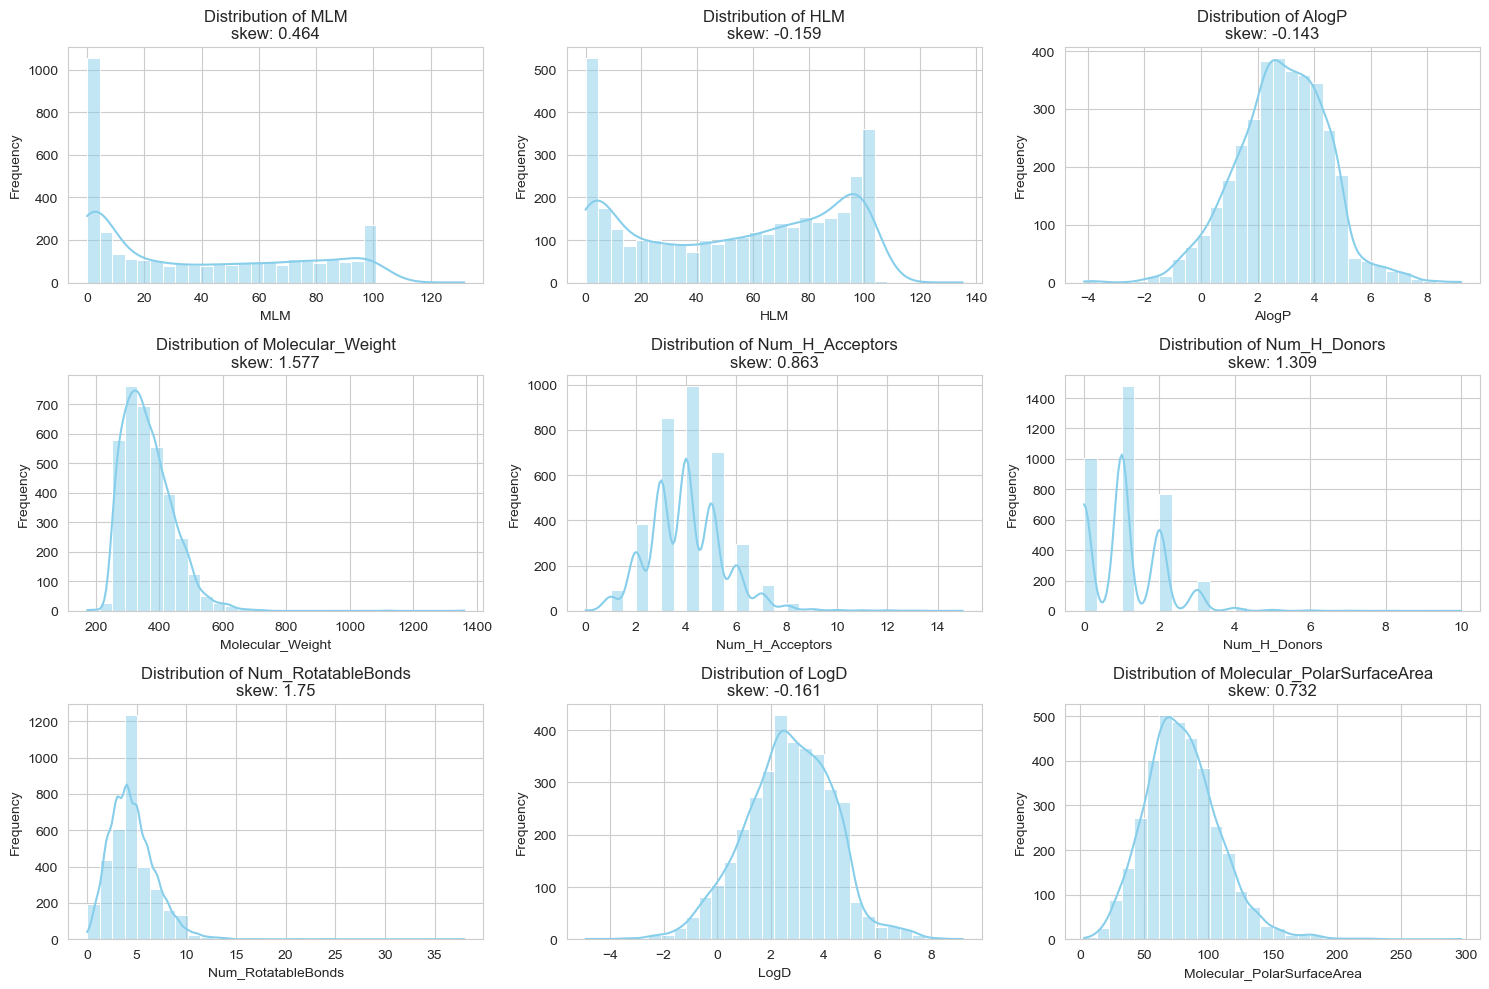

In [9]:
# 데이터의 skew 처리는 고민해봐야 한다.

# MLM: 하위 끝에 값들이 주로 모여 오른쪽으로 치우친 분포를 보입니다.
# HLM: 두 개의 봉우리를 가진 양극단 분포를 나타냅니다.
# AlogP: 약간의 오른쪽 치우침이 있는 거의 정규 분포를 보여줍니다.
# Molecular_Weight: 하위 끝에 값들이 주로 모여 오른쪽으로 치우친 분포를 보입니다.
# Num_H_Acceptors: 이 열도 오른쪽으로 치우친 분포를 나타냅니다.
# Num_H_Donors: 하위 끝에 값들이 주로 모여 오른쪽으로 치우친 분포를 보입니다.
# Num_RotatableBonds: 값들의 주요 부분이 하위쪽에 모여 오른쪽으로 치우친 분포를 나타냅니다.
# LogD: 거의 정규 분포처럼 보이지만 약간의 오른쪽 치우침이 있는 분포입니다.
# Molecular_PolarSurfaceArea: 중간 범위에 값들이 주로 모여 왼쪽으로 치우친 분포를 보입니다.

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

numerical_columns = ['MLM', 'HLM', 'AlogP', 'Molecular_Weight', 'Num_H_Acceptors', 'Num_H_Donors', 
                     'Num_RotatableBonds', 'LogD', 'Molecular_PolarSurfaceArea']

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_train[col], bins=30, color='skyblue', kde=True)
    plt.title(f'Distribution of {col}\nskew: {round(df_train[col].skew(),3)}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

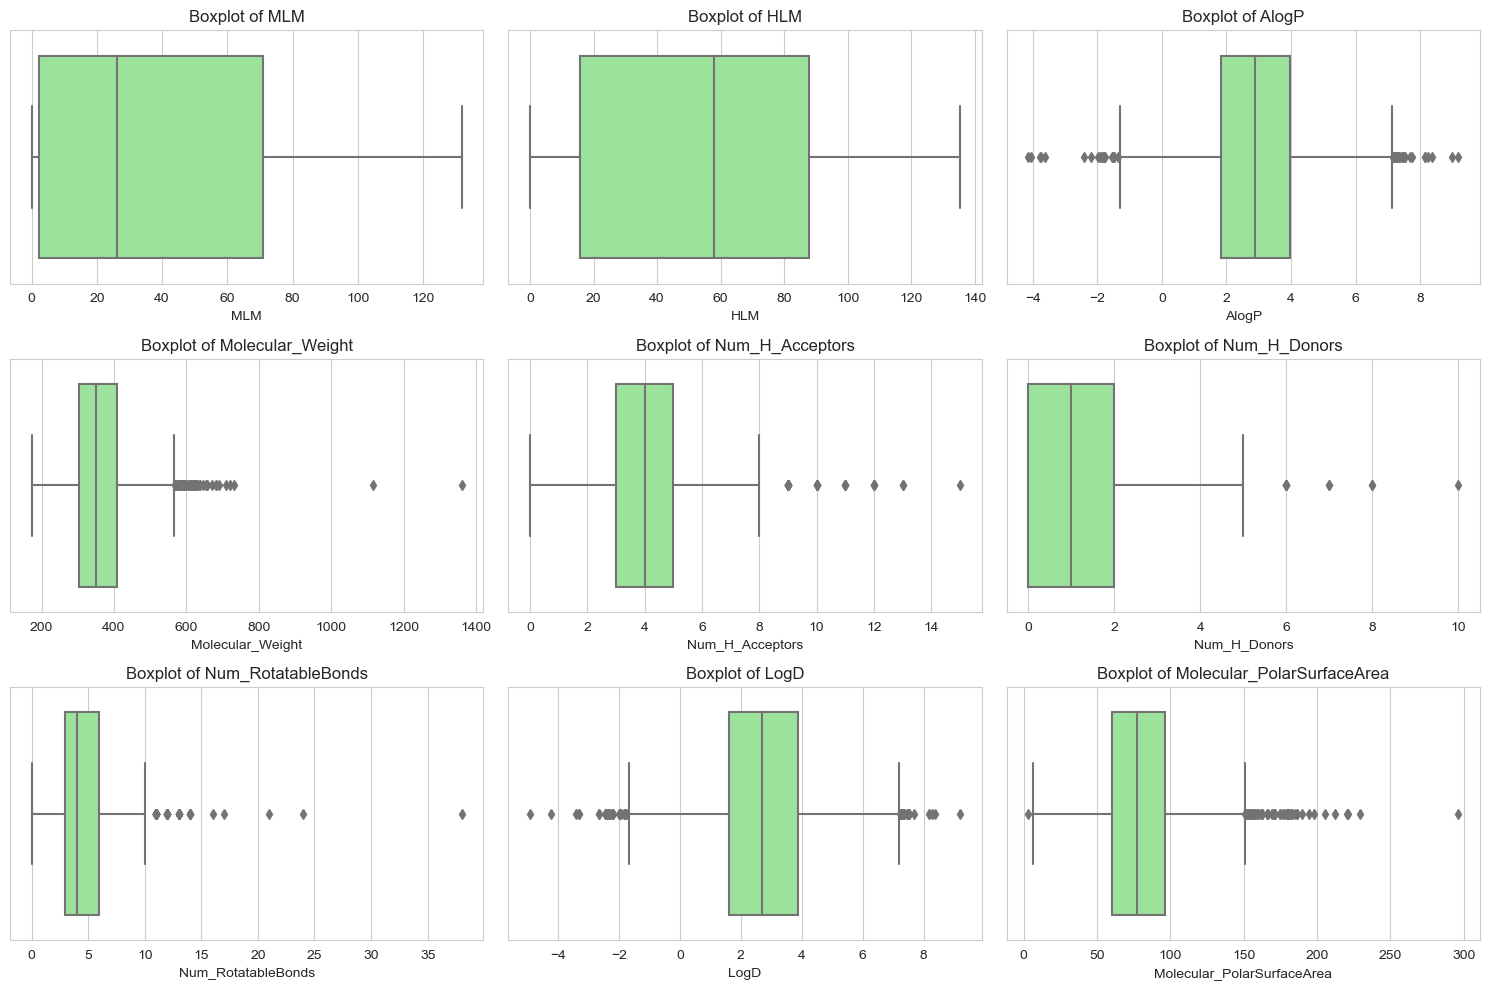

In [5]:
# MLM, HLM 100 이상값 제거
# polar surface 300 확인

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_train[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [10]:
bins = [0, 200, 400, 600, df_train['Molecular_Weight'].max()]
labels = ['Low Molecular Weight', 'Moderate Molecular Weight', 'High Molecular Weight', 'Very High Molecular Weight']
df_train['Molecular_Weight_Bins'] = pd.cut(df_train['Molecular_Weight'], bins=bins, labels=labels)

# Display the first few rows of the dataframe to check the new column
df_train[['Molecular_Weight', 'Molecular_Weight_Bins']].head()

,Molecular_Weight,Molecular_Weight_Bins
0,400.495,High Molecular Weight
1,301.407,Moderate Molecular Weight
2,297.358,Moderate Molecular Weight
3,494.652,High Molecular Weight
4,268.310,Moderate Molecular Weight


In [11]:
# 의미가 있는 특성 공학인지 고민해볼 필요가 있음
# Create a new interaction term by multiplying Num_H_Acceptors and Num_H_Donors
df_train['H_Acceptors_x_H_Donors'] = df_train['Num_H_Acceptors'] * df_train['Num_H_Donors']
df_train[['Num_H_Acceptors', 'Num_H_Donors', 'H_Acceptors_x_H_Donors']].head()

,Num_H_Acceptors,Num_H_Donors,H_Acceptors_x_H_Donors
0,5,2,10
1,2,1,2
2,5,0,0
3,6,0,0
4,3,0,0


In [12]:
df_train['AlogP'].fillna(df_train['LogD'], inplace=True)
df_train['AlogP'].isnull().sum()

0

In [14]:
df_train['AlogP^2'] = df_train['AlogP'] * df_train['AlogP']
df_train['LogD^2'] = df_train['LogD'] * df_train['LogD']
df_train['Alog_LogD'] = df_train['AlogP'] * df_train['LogD']
df_train

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,Molecular_Weight_Bins,H_Acceptors_x_H_Donors,AlogP^2,LogD^2,Alog_LogD
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37,High Molecular Weight,10,10.621081,10.621081,10.621081
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47,Moderate Molecular Weight,2,4.704561,4.717584,4.711068
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45,Moderate Molecular Weight,0,2.537649,2.512225,2.524905
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60,High Molecular Weight,0,22.762441,12.075625,16.579225
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43,Moderate Molecular Weight,0,5.452225,5.461569,5.456895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74,Moderate Molecular Weight,3,11.621281,11.621281,11.621281
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37,Moderate Molecular Weight,4,3.655744,3.400336,3.525728
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14,Moderate Molecular Weight,3,3.767481,4.511376,4.122684
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51,Moderate Molecular Weight,5,0.978121,0.978121,0.978121


In [15]:
df_train['SMILES_Length'] = df_train['SMILES'].apply(len)
df_train[['SMILES', 'SMILES_Length']].head()

,SMILES,SMILES_Length
0,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,47
1,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,36
2,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,32
3,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,63
4,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,35
